<a href="https://colab.research.google.com/github/idrisskc/tf.ai/blob/main/Tf_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#gradient descent
import tensorflow as tf 
x = tf.Variable(2.)
with tf.GradientTape() as tape:
  y = x**5
ff = tape.gradient(y, x)
print(ff)   

tf.Tensor(80.0, shape=(), dtype=float32)


In [ ]:
#gradient descent with constant as variables
import tensorflow as tf 
p = tf.constant([2.])
k = tf.constant([5.])
with tf.GradientTape()as tape:
  tape.watch([p, k])
  y =p**3+k*5
ff = tape.gradient(y, [p,k])
print(y)  

#defined models and layers in tensorflows
class SimpleModule(tf.Module):
  def __init__(self, name = None):
    super().__init__(name = name)
    self.a = tf.Variable(5., name = "train_me")
    self.b = tf.Variable(8., trainable = False,name = "don't train me") 
  def __call__(self, x):
    y = self.a*x + self.b  
model = SimpleModule(name = "idriss") 
model(tf.constant(5.))   

tf.Tensor([33.], shape=(1,), dtype=float32)


Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5235 - accuracy: 0.4421 - val_loss: 1.2556 - val_accuracy: 0.5571
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1437 - accuracy: 0.5954 - val_loss: 1.1492 - val_accuracy: 0.5941
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0049 - accuracy: 0.6471 - val_loss: 0.9681 - val_accuracy: 0.6674
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9125 - accuracy: 0.6783 - val_loss: 0.9442 - val_accuracy: 0.6761
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8512 - accuracy: 0.7006 - val_loss: 0.9514 - val_accuracy: 0.6721
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7979 - accuracy: 0.7193 - val_loss: 0.8650 - val_accuracy: 0.7054
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7533 - accuracy: 0.7366 - val_loss: 0.8817 -

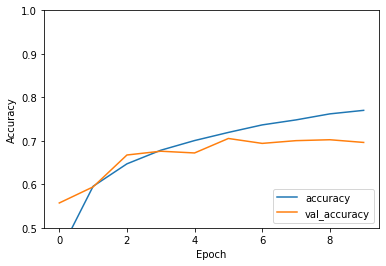

In [2]:
# convolutional neural network using CIFAR10
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/250.0, test_images/250.0
# verify Data
# ------------------------------------------------------------------
#create a convolutive base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
h = model.fit(train_images, train_labels, epochs =10,validation_data=(test_images, test_labels))

plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)